<a href="https://colab.research.google.com/github/AhMedDa1/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Perform Exploratory Data Analysis




We will be using [Automobile](https://www.kaggle.com/toramky/automobile-dataset) Dataset for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
data = pd.read_csv('Automobile_data.csv')


In [42]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Check for missing values**

In [43]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

It's appear we don’t have any missing values. but we have observed that there were ‘?’ symbols in the dataset, which means that these symbols are in the form of an object.

In [44]:
# check for unique values to see if there any wrong entry:

for col in data.columns:
  print('{} : {}'.format(col, data[col].unique()) )

symboling : [ 3  1  2  0 -1 -2]
normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num-of-doors : ['two' 'four' '?']
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels : ['rwd' 'fwd' '4wd']
engine-location : ['front' 'rear']
wheel-base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

There are null values in our dataset in form of ‘?’ only but pandas are not reading them so we will replace them into np.nan form.

In [45]:
for col in data.columns:
  data[col].replace({'?':np.nan}, inplace=True)

In [46]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can observe that now there are missing values in some columns.



**Visualizing the missing values**

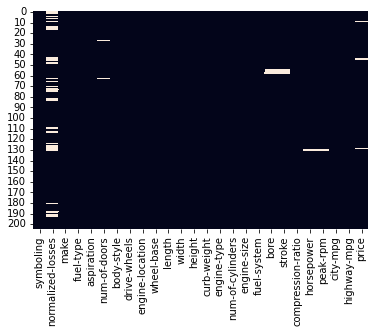

In [32]:
sns.heatmap(data.isnull(),cbar=False)


Now observe that there are many missing values in normalized_losses while other columns have fewer missing values. We can’t drop the normalized_losses column as it may be important for our prediction.

In [51]:
#We will be replacing these missing values with mean because the number of missing values is less(we can use median too).

num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']

for col in num_col:
  data[col] = pd.to_numeric(data[col])
  data[col].fillna(data[col].mean(), inplace=True)


let us check the correlation between different variables, this will give us a roadmap on how to proceed further.

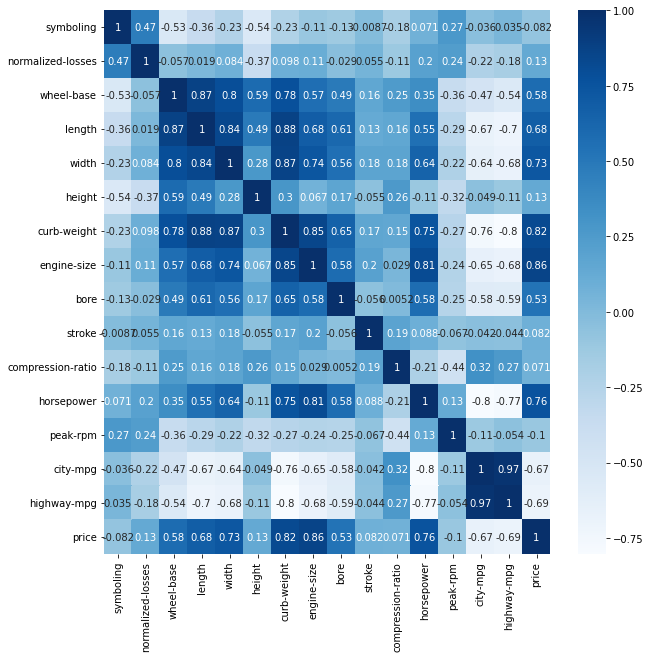

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

**Positive Correlation**


*   Price – wheel-base, length, width, curb-weight, engine-size, bore, horsepower
*   wheelbase – length, width, height, curb-weight, engine-size, price
*   horsepower – length, width, curb-weight, engine-size, bore, price
*   Highway mpg – city mpg

**Negative Correlation**



*   Price – highway-mpg, city-mpg
*   highway-mpg – wheel base, length, width, curb-weight, engine-size, bore, horsepower, price
*   city – wheel base, length, width, curb-weight, engine-size, bore, horsepower, price

This heatmap has given us great insights into the data.

How does the wheel-base affect the price?

Text(0, 0.5, 'Price')

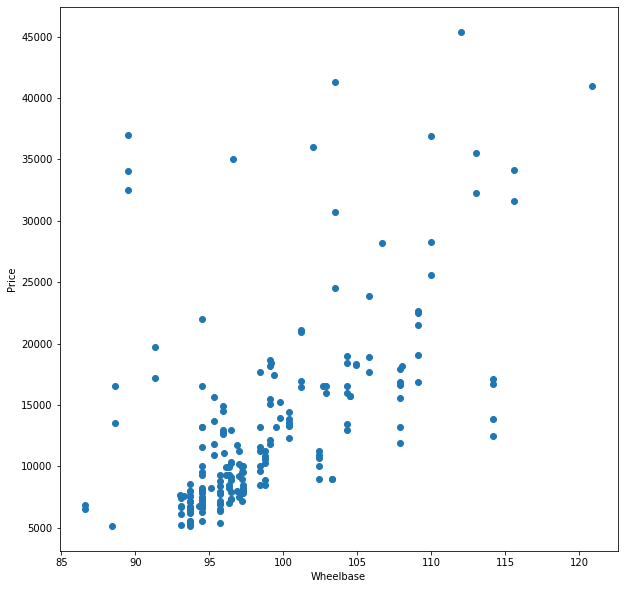

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(x='wheel-base',y='price',data=data)
plt.xlabel('Wheelbase')
plt.ylabel('Price')

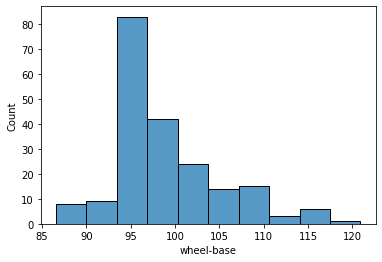

In [74]:
sns.histplot(data['wheel-base'],bins=10)


The average count between 93-97 is 80 and it is positively skewed.



Text(0, 0.5, 'Price')

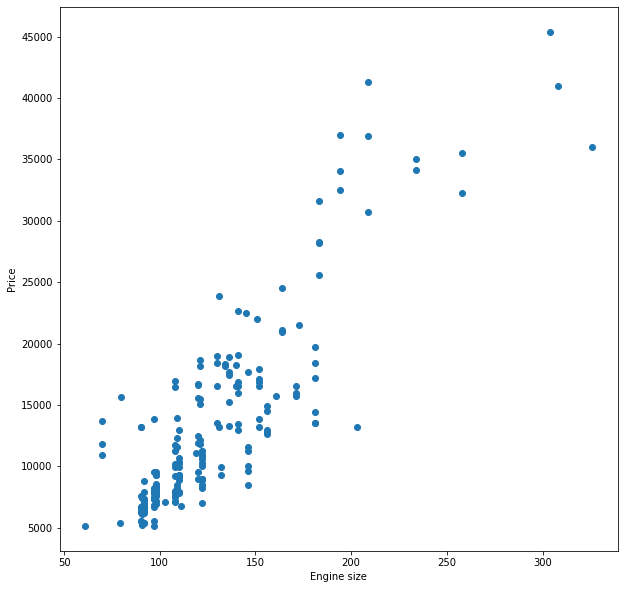

In [75]:
#What is the relation between engine_size and price?

plt.figure(figsize=(10,10))
plt.scatter(x='engine-size',y='price',data=data)
plt.xlabel('Engine size')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

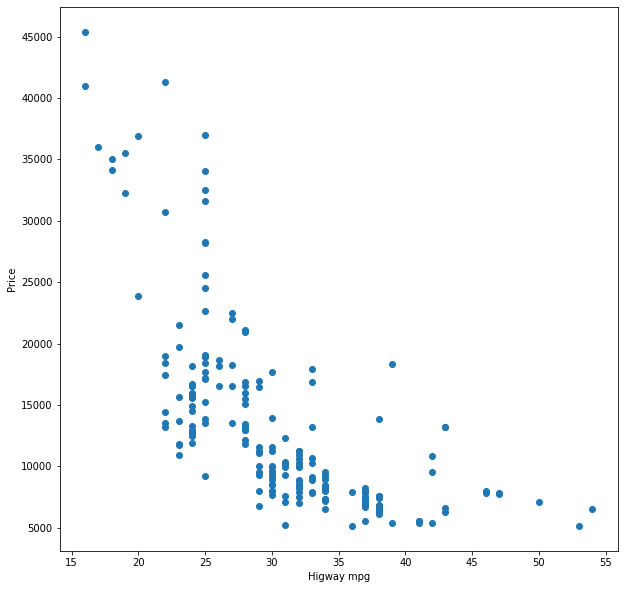

In [78]:
#How does highway_mpg affects price?
plt.figure(figsize=(10,10))
plt.scatter(x='highway-mpg',y='price',data=data)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

We can see price decreases with an increase in higway-mpg.


In [81]:
# Relation between no. of doors and price
#Let us check the number of doors.

data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

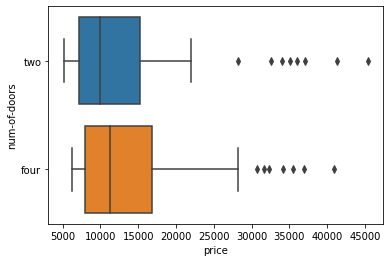

In [83]:
#We will use a boxplot for this analysis.

sns.boxplot(x='price',y='num-of-doors',data=data)


we can conclude that the average price of a vehicle with two doors is 10000,  and the average price of a vehicle with four doors is 12000.